# Getting Started

Create complex two-dimensional geometries, called _domains_, using the `pargeo.domain.Domain` module.

A domain is made of multiple _subdomains_, which are shapely polygons or multi-plolygons. You can use the `pargeo.domain.Geometry` to access a variety of shapes.

The domain is then build sequentially, by adding one subdomain after the other starting with the background domain.


In [1]:
import pargeo as pg

background_subdomain = pg.geometry.Rectangle(midpoint=(0, 0), width=1, height=1).to_polygon()

domain = pg.Domain(background_subdomain)

To add other subdomains, use the `Domain.add_subdomain` method. At this point you will need to specify a level for the subdomain. The level will then decide how the new subdomain is added to the domain following these rules:

- Subdomains with the same level are merged together (set **union**)
- Subdomains with higher level are cut out of those with a lower one (set **difference**)

You can plot your domain at any time using the `Domain.plot` method, or by using the `pargeo.
plot_subdomain` utility function.


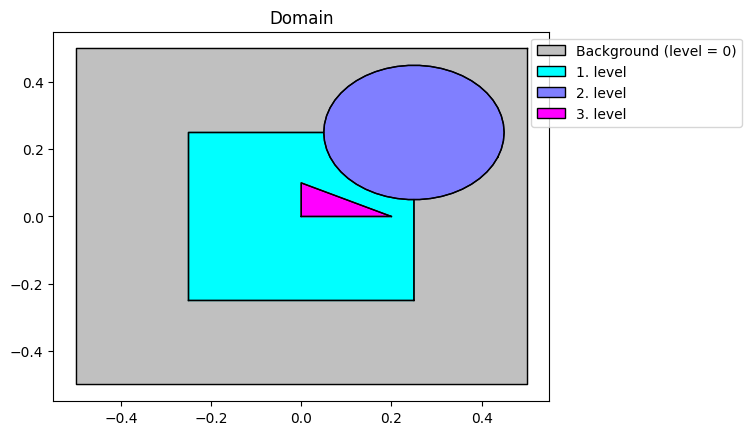

In [2]:
# Create some other subdomains.
subdomain1 = pg.geometry.Rectangle(midpoint=(0, 0), width=.5, height=.5).to_polygon()
subdomain2 = pg.geometry.Circle(midpoint=(.25, .25), radius=.2).to_polygon(refs=50)

# Subdomains are just shapely polygons or multi-polygons, so you can use shapely directly.
import shapely
subdomain3 = shapely.Polygon([(0, 0), (.2, 0), (0, .1)])

# Add subdomains to the domain
domain.add_subdomain(subdomain1, level=1)
domain.add_subdomain(subdomain2, level=2)
domain.add_subdomain(subdomain3, level=3)

# Plot the domain
domain.plot()

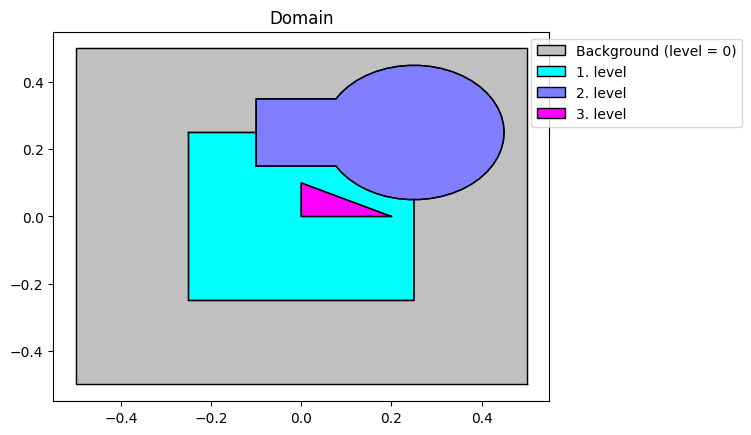

In [3]:
# Create a subdomain that should be merged with the circle.
subdomain4 = pg.geometry.Rectangle(midpoint=(.0, .25), width=.2, height=.2).to_polygon()
domain.add_subdomain(subdomain4, level=2)

# Plot the domain again
domain.plot()

## Add Holes to you Domain

Your domain can contain holes. Holes will be plotted differently (per deafult in white) and will **not** be passed to Gmsh and therefore not be meshed.

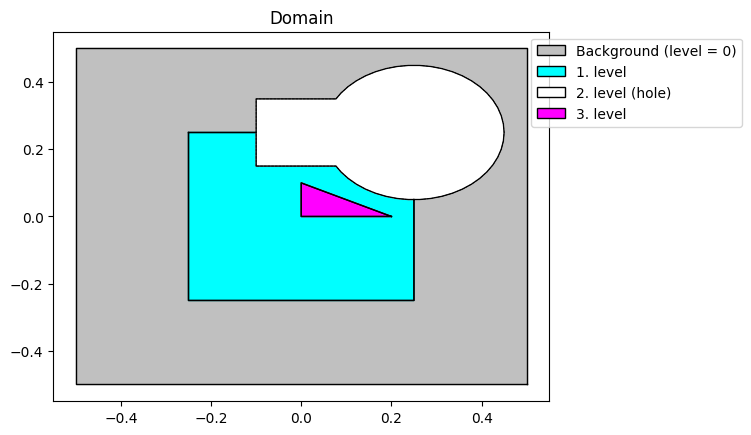

In [4]:
domain.set_holes({2})

# plot the updated domain 
domain.plot()